In [1]:
!nvidia-smi

Thu Jul  3 10:01:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
content=os.getcwd()
print(content)

/content


In [3]:
%pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.

In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/112.6 GB disk)


In [5]:
!mkdir {content}/datasets
%cd {content}/datasets

/content/datasets


In [6]:
from google.colab import userdata
from roboflow import Roboflow

In [7]:
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("amaan333").project("accident-detection-mafsy")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident-detection-1 in yolov11:: 100%|██████████| 1612/1612 [00:00<00:00, 6820.63it/s]


In [8]:
%cd {content}

/content


In [9]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 batch=64 imgsz=640 plots=true

100% 21.5M/21.5M [00:00<00:00, 251MB/s]
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Accident-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pati

In [11]:
!ls {content}/runs/detect/train

args.yaml			 R_curve.png	    train_batch92.jpg
confusion_matrix_normalized.png  results.csv	    val_batch0_labels.jpg
confusion_matrix.png		 results.png	    val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg   val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg   val_batch1_pred.jpg
labels.jpg			 train_batch2.jpg   weights
P_curve.png			 train_batch90.jpg
PR_curve.png			 train_batch91.jpg


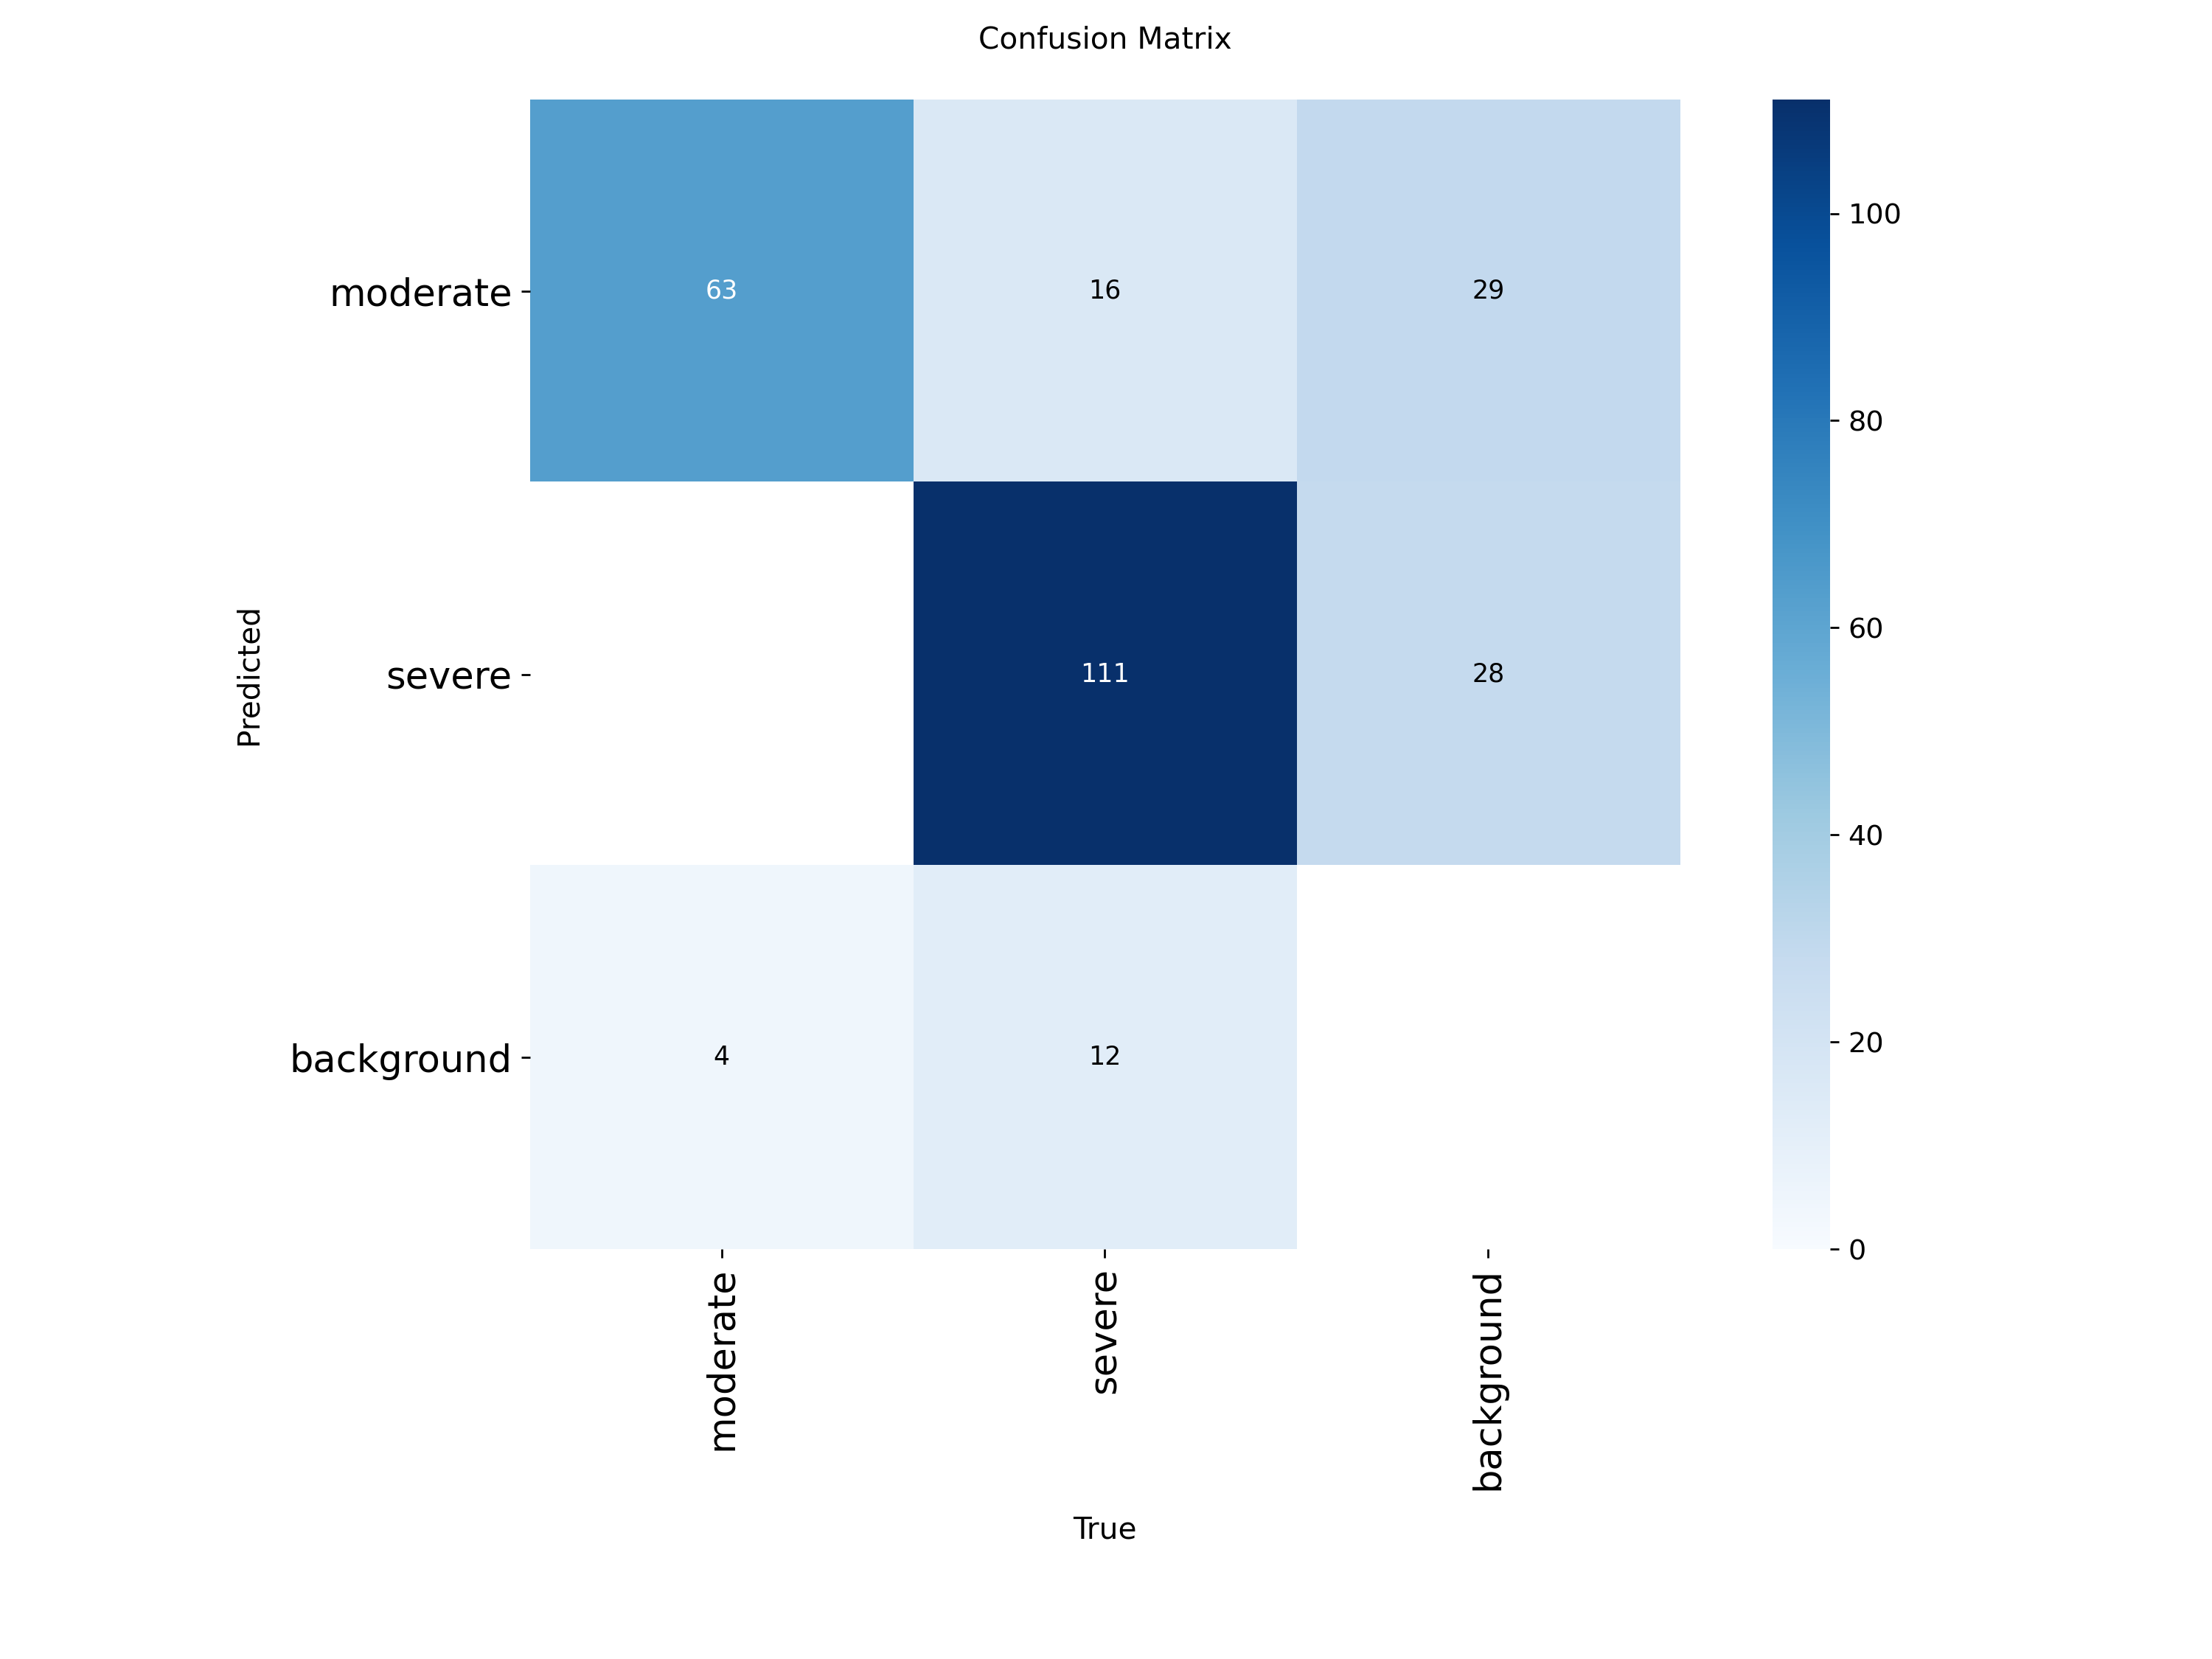

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{content}/runs/detect/train/confusion_matrix.png', width=600)

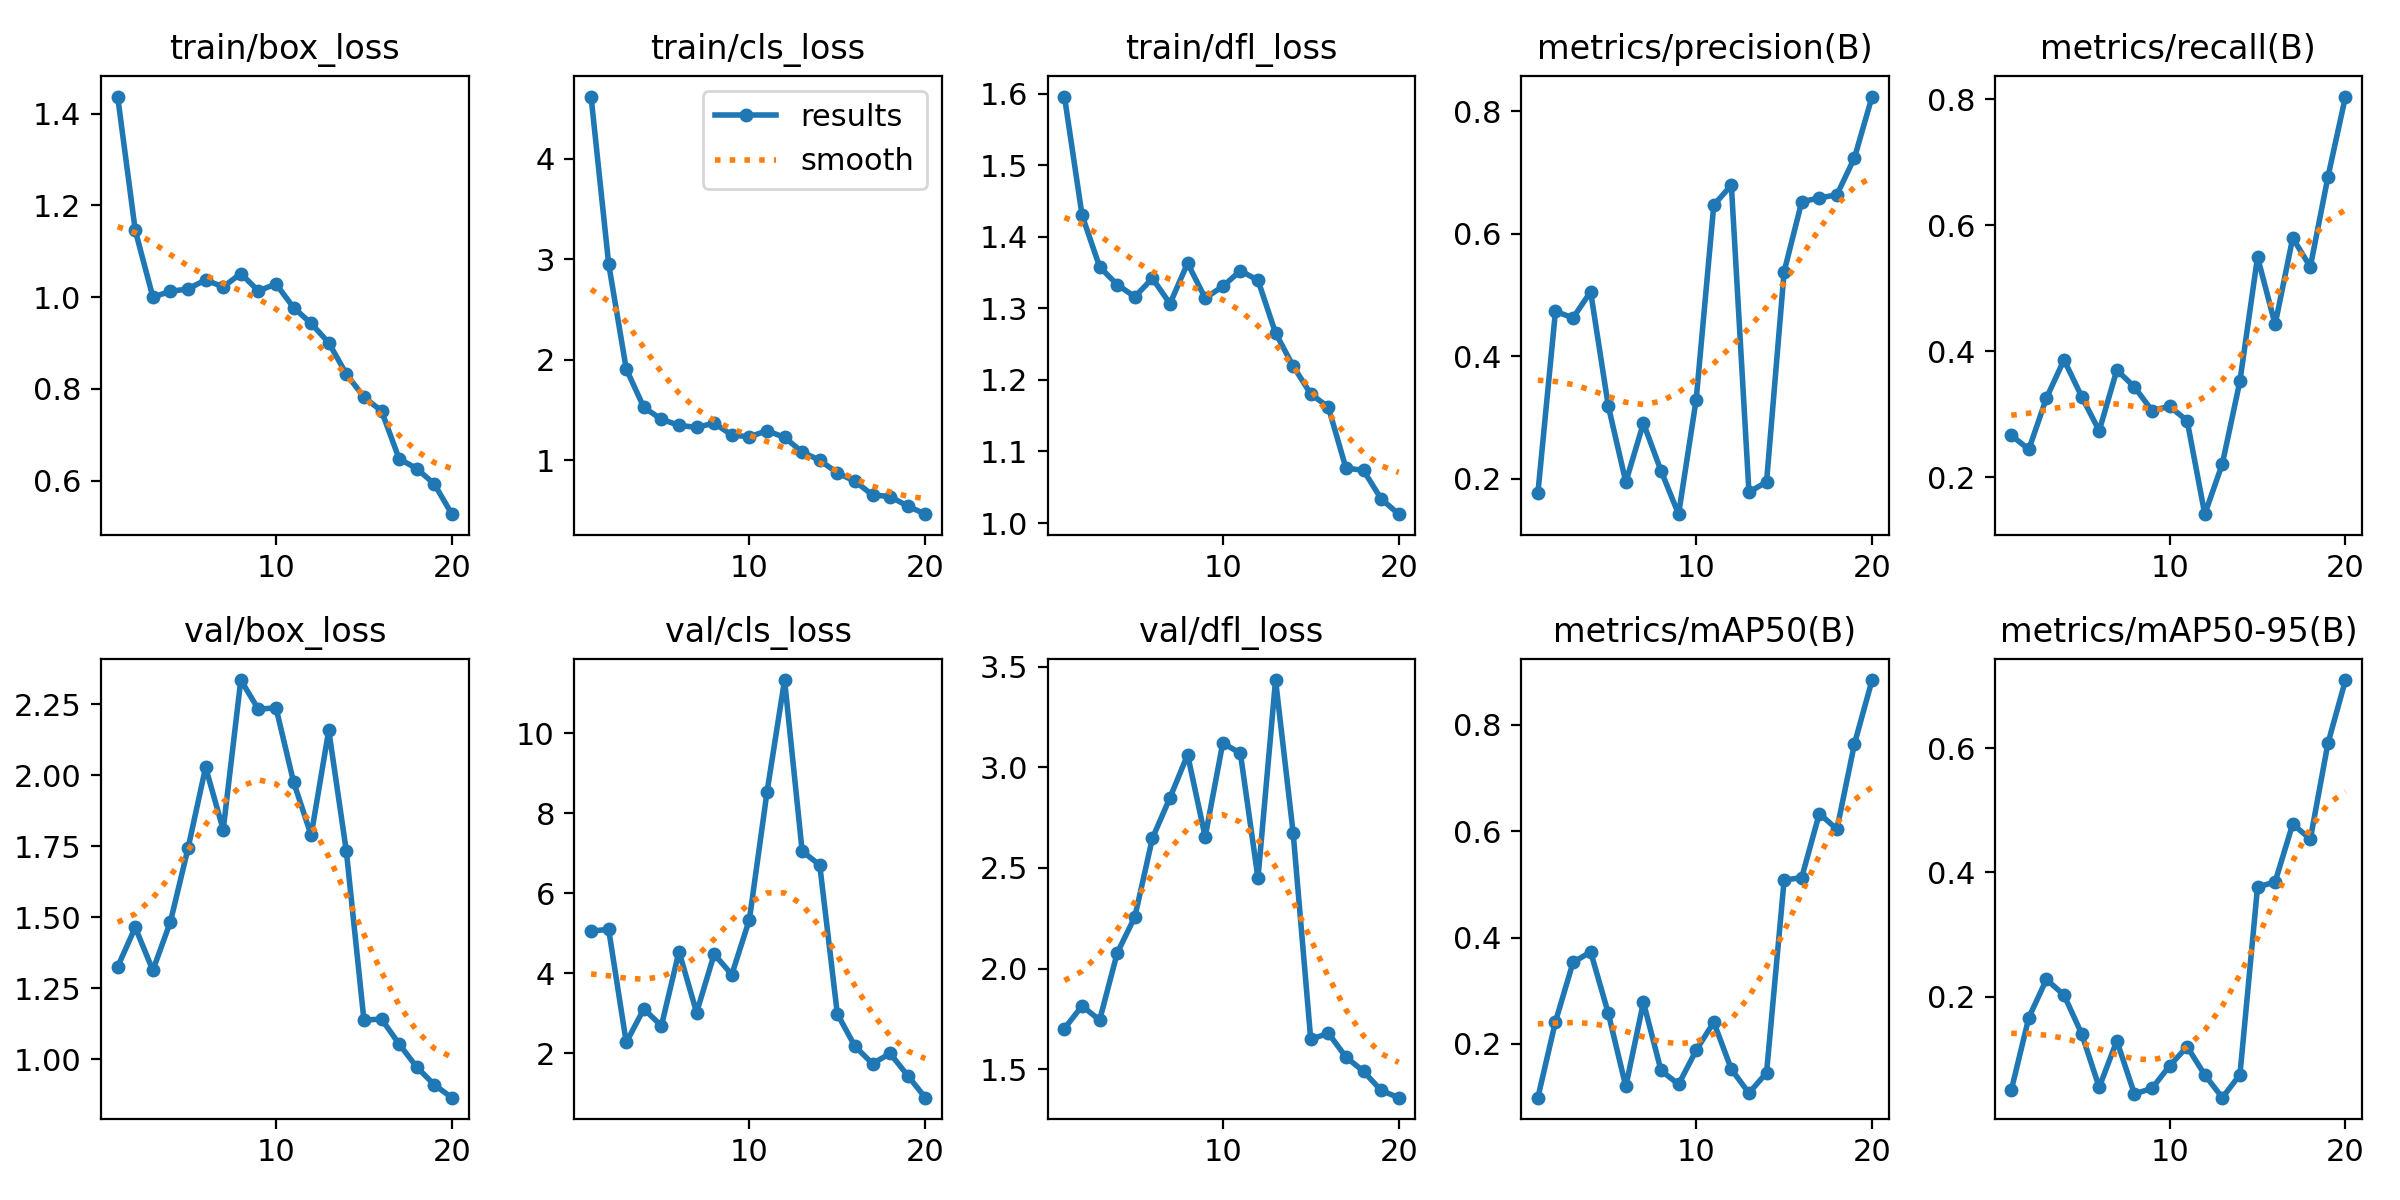

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{content}/runs/detect/train/results.png', width=600)

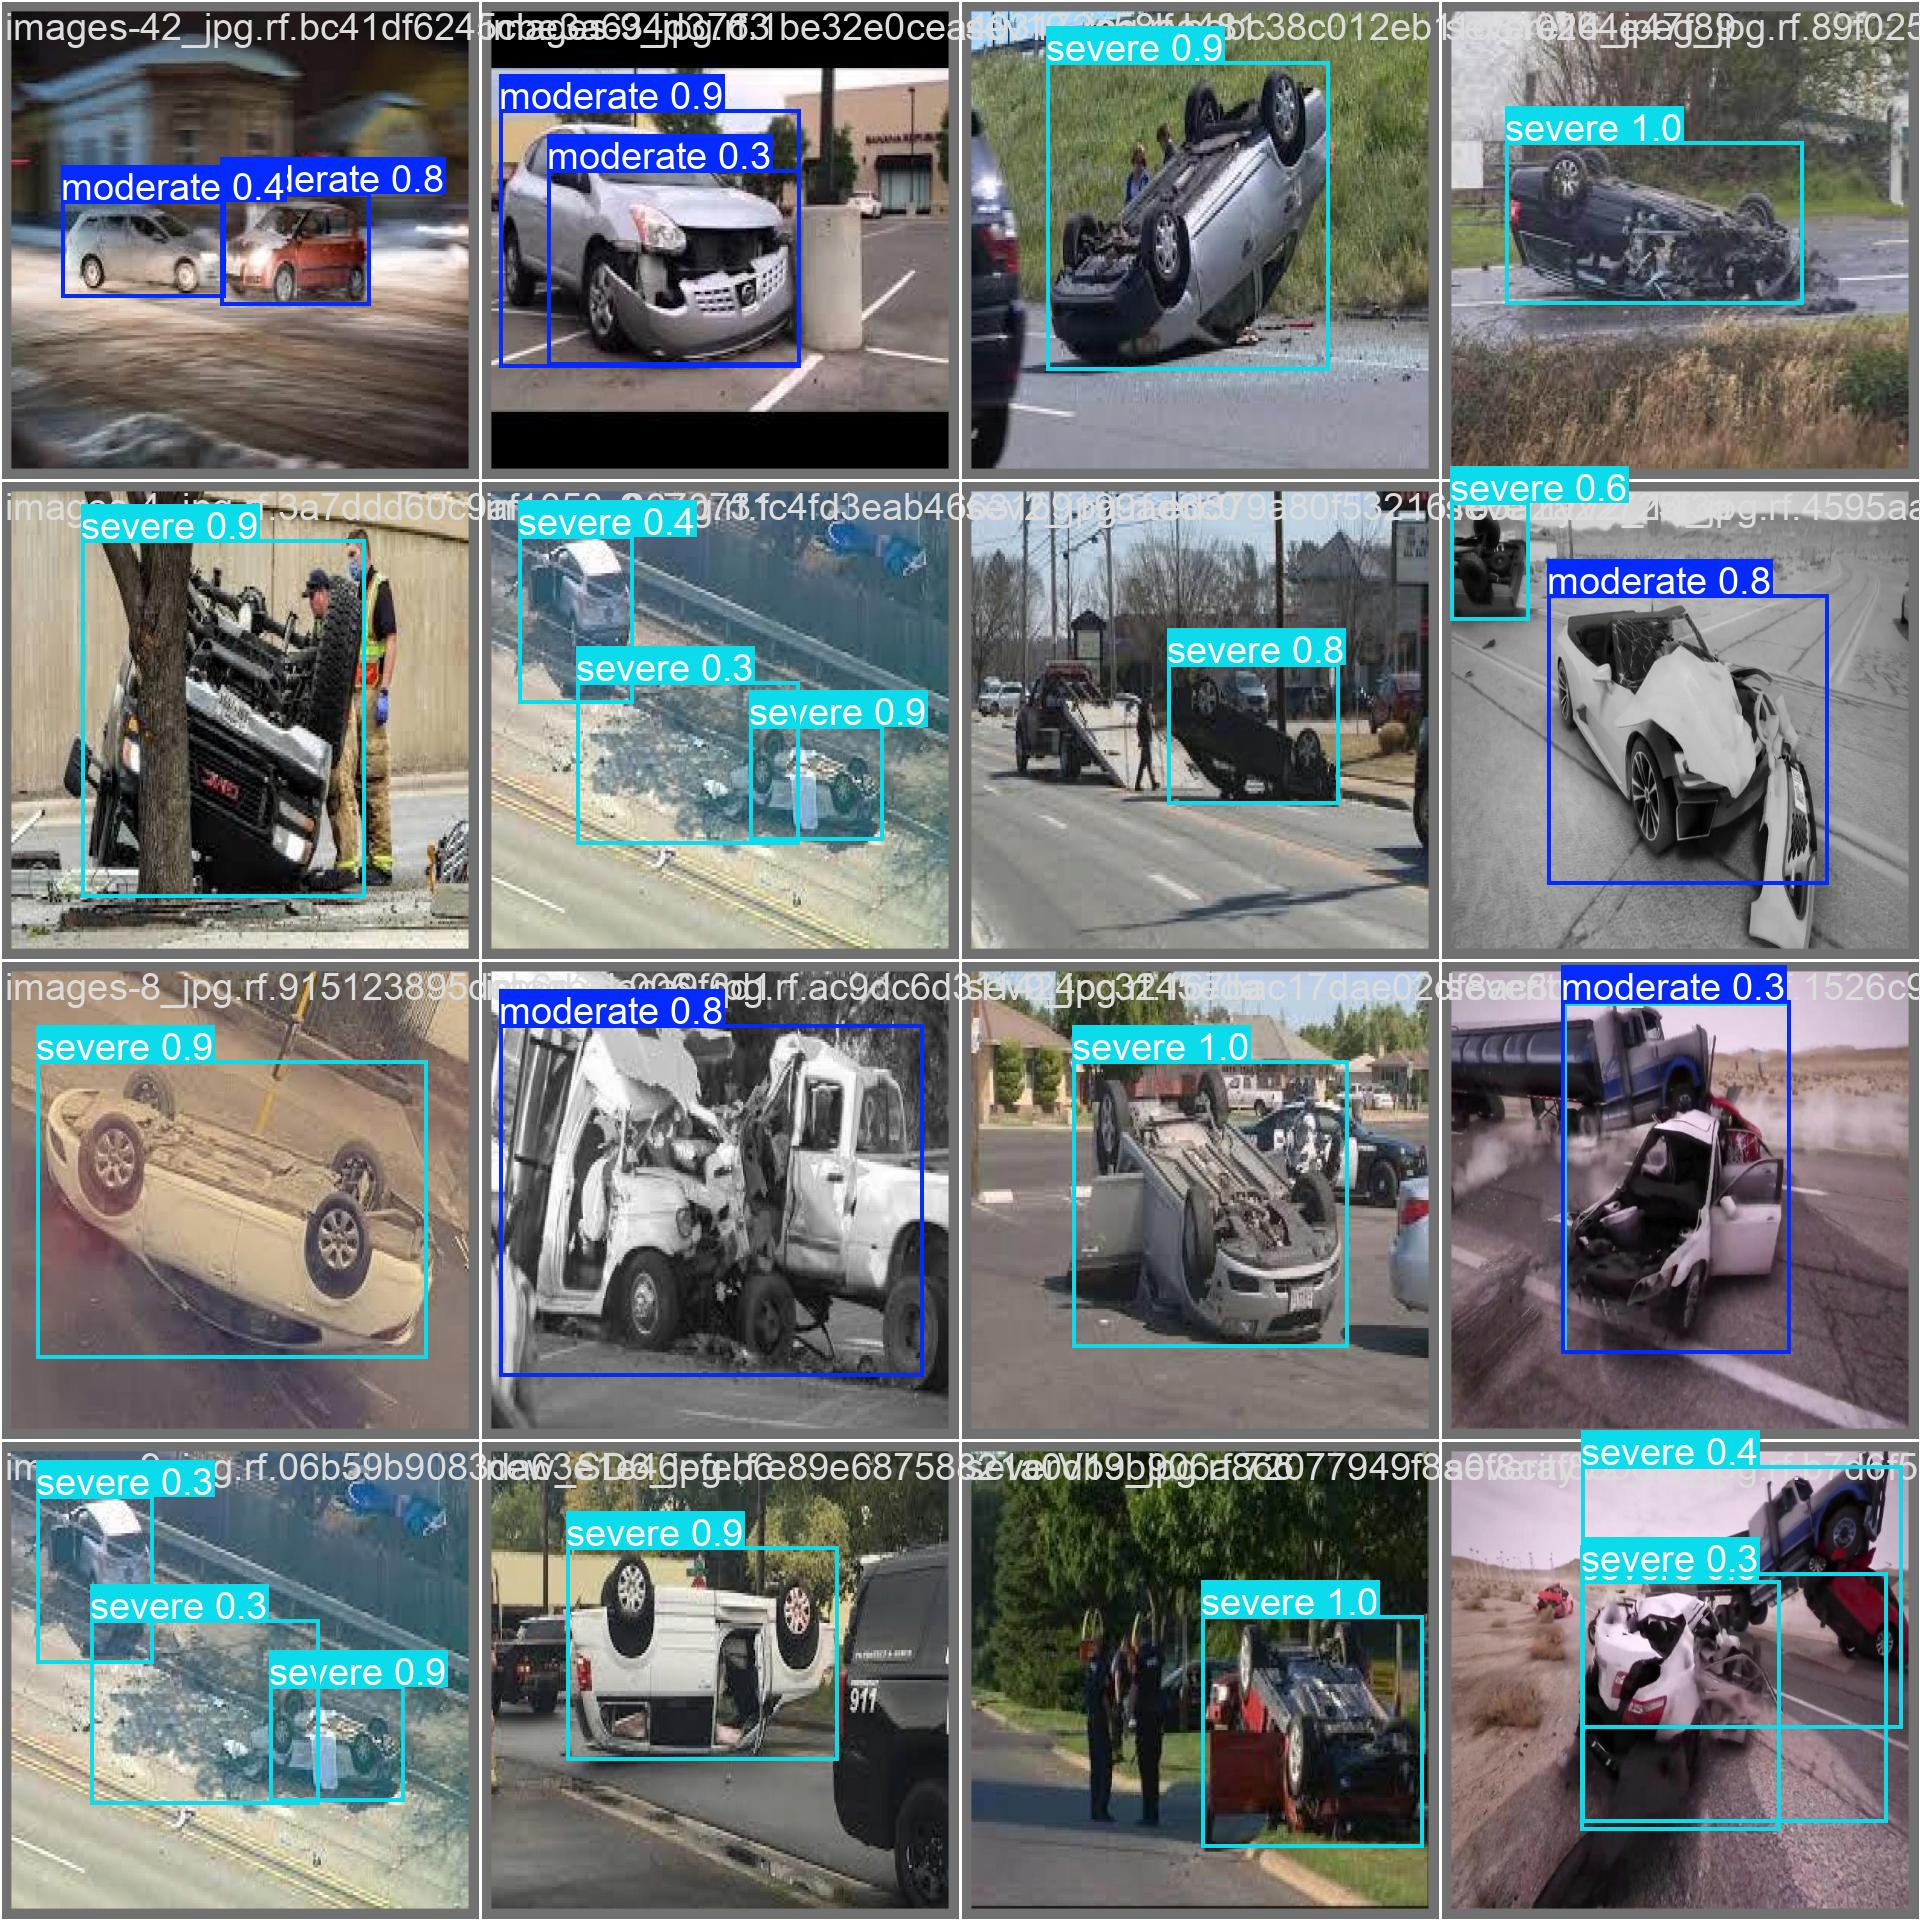

In [14]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{content}/runs/detect/train/val_batch1_pred.jpg', width=600)

In [15]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/Accident-Detection-1/data.yaml

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 983, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 633, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/validator.py", line 175, in __call__
    self.data = check_det_dataset(self.args.data)
                ^^^^^^^^^^^^^^^^^^^^^^

In [18]:
from google.colab import files
uploaded=files.upload()

Saving video_accident1.mp4 to video_accident1.mp4


In [19]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.4 source='accident_1.jpg' save=True

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/accident_1.jpg: 480x640 1 severe, 38.9ms
Speed: 2.9ms preprocess, 38.9ms inference, 139.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


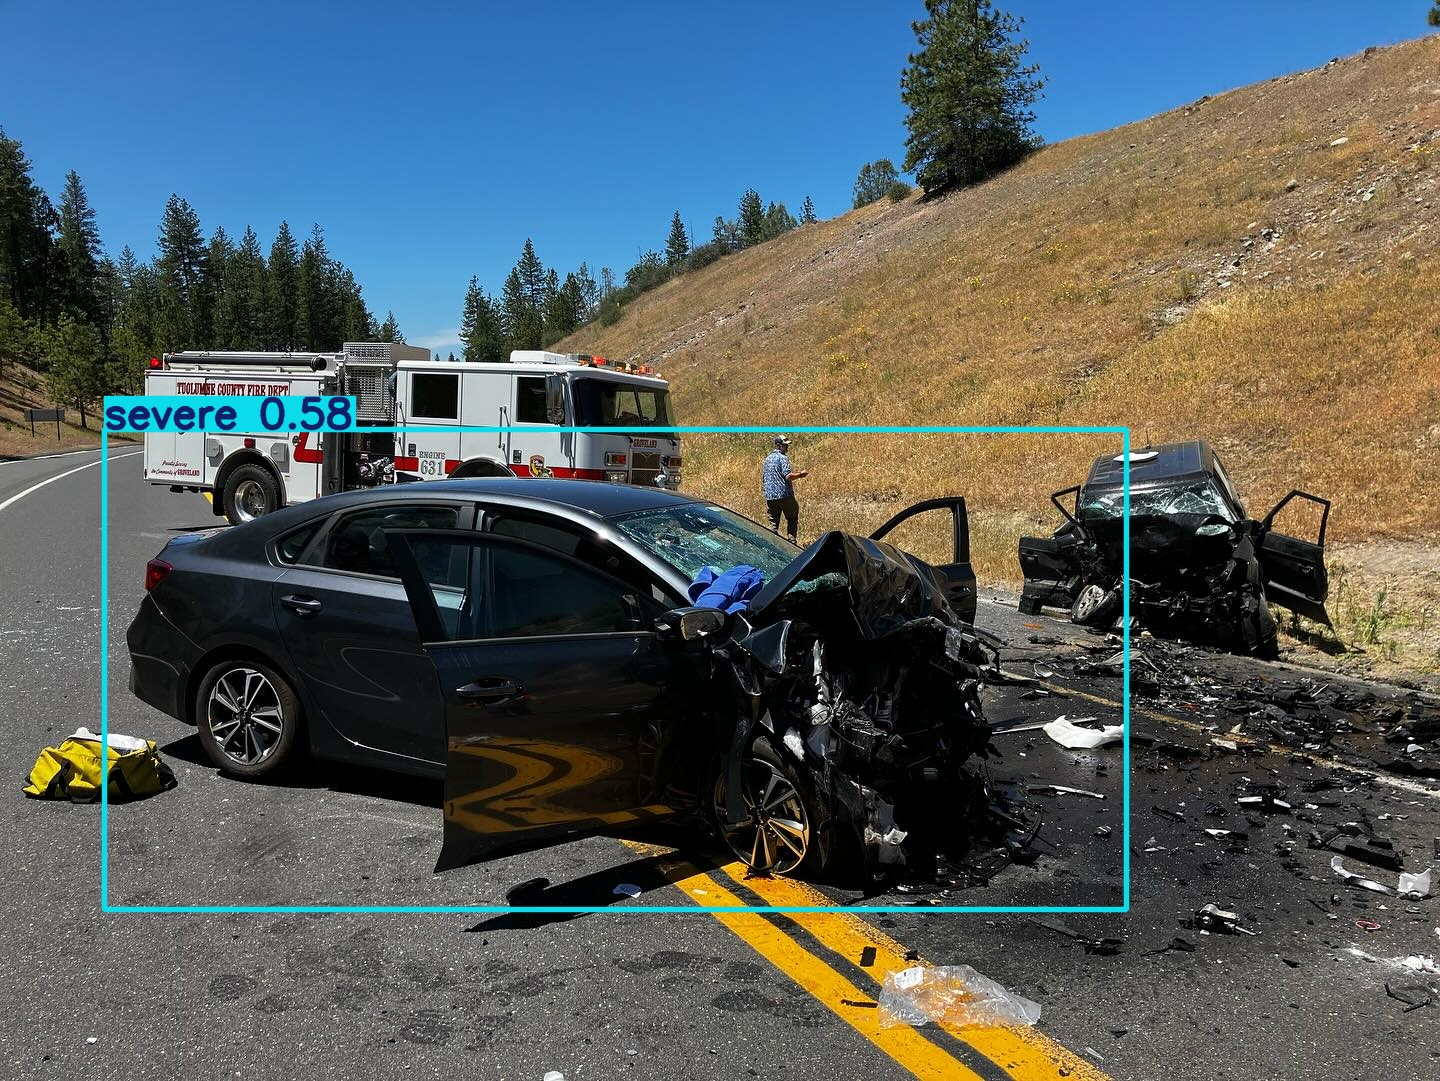

In [20]:
from IPython.display import Image

output_dir = "runs/detect/predict"
output_files = os.listdir(output_dir)
Image(filename=os.path.join(output_dir, output_files[0]),width=700)

In [21]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.4 source='video_accident2.mp4' save=True save_txt=True

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/141) /content/video_accident2.mp4: 384x640 1 moderate, 38.9ms
video 1/1 (frame 2/141) /content/video_accident2.mp4: 384x640 1 moderate, 12.9ms
video 1/1 (frame 3/141) /content/video_accident2.mp4: 384x640 (no detections), 10.8ms
video 1/1 (frame 4/141) /content/video_accident2.mp4: 384x640 (no detections), 10.8ms
video 1/1 (frame 5/141) /content/video_accident2.mp4: 384x640 (no detections), 10.8ms
video 1/1 (frame 6/141) /content/video_accident2.mp4: 384x640 1 moderate, 10.9ms
video 1/1 (frame 7/141) /content/video_accident2.mp4: 384x640 (no detections), 10.8ms
video 1/1 (frame 8/141) /content/video_accident2.mp4: 384x640 (no detections), 10.7ms
video 1/1 (frame 9/141) /content/video_accident2.mp4: 384x640 2 moderates, 10.7ms
video 1/1 (frame 10/141) /content/video_accident2.mp4: 384x640 1 moderate, 10.7

In [25]:
#STEP-1 : Video to CCTV mapping

video_to_cctv = {
    "video_accident1.mp4": "CCTV_01",
    "video_accident2.mp4": "CCTV_02",
    "video_accident3.mp4": "CCTV_03"
}

#STEP-2 : CCTV to co-ordinates mapping
cctv_locations = {
    "CCTV_01": {"lat": 12.9716, "lon": 77.5946},
    "CCTV_02": {"lat": 12.2958, "lon": 76.6394},
    "CCTV_03": {"lat": 13.0827, "lon": 80.2707}
}

#STEP-3 : CCTV to Hospitals mapping

cctv_to_hospital = {
    "CCTV_01": {
        "name": "Manipal Hospital, Bengaluru",
        "contact": "+91-80-2502-4444"
    },
    "CCTV_02": {
        "name": "Apollo BGS Hospital, Mysuru",
        "contact": "+91-821-256-8888"
    },
    "CCTV_03": {
        "name": "MIOT International Hospital, Chennai",
        "contact": "+91-44-4200-2288"
    }
}

class_map = {0: "moderate", 1: "severe"}

def send_alert(video_name, severity):
    cctv_id = video_to_cctv[video_name]
    location = cctv_locations[cctv_id]
    hospital = cctv_to_hospital[cctv_id]

    print(f"\n🚨 ALERT: {severity.upper()} accident detected in {video_name}")
    print(f"📷 CCTV: {cctv_id} at location (lat: {location['lat']}, lon: {location['lon']})")
    print(f"🏥 Alert sent to hospital: {hospital['name']}")
    print(f"📞 Contact: {hospital['contact']}")


In [26]:
label_folder = "runs/detect/predict2/labels"

In [29]:

alerted_videos = set()

if os.path.exists(label_folder):
    for filename in os.listdir(label_folder):
        if filename.endswith(".txt"):

            base_video = filename.rsplit("_", 1)[0]
            full_video_name = base_video + ".mp4"


            if full_video_name in alerted_videos:
                continue

            label_path = os.path.join(label_folder, filename)

            with open(label_path, 'r') as f:
                lines = f.readlines()
                for line in lines:
                    class_id = int(line.strip().split()[0])
                    if class_id in class_map:
                        severity = class_map[class_id]
                        send_alert(full_video_name, severity)
                        alerted_videos.add(full_video_name)
                        break
    print("⚠️ No label folder found")



🚨 ALERT: MODERATE accident detected in video_accident2.mp4
📷 CCTV: CCTV_02 at location (lat: 12.2958, lon: 76.6394)
🏥 Alert sent to hospital: Apollo BGS Hospital, Mysuru
📞 Contact: +91-821-256-8888


In [33]:
from IPython.display import Video

Video("runs/detect/predict/output2.mp4", embed=True,width=800)

In [30]:
!apt install ffmpeg -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [31]:
!ffmpeg -i runs/detect/predict2/video_accident2.avi runs/detect/predict/output2.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [32]:
from IPython.display import Video

Video("runs/detect/predict/output2.mp4", embed=True,width=800)